In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
from keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters,biases = model.layers[i].get_weights()
    print('layer number',i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
filters,biases = model.layers[1].get_weights()

In [6]:
f_min,f_max = filters.min(),filters.max()
filters  = (filters-f_min)/(f_max-f_min)

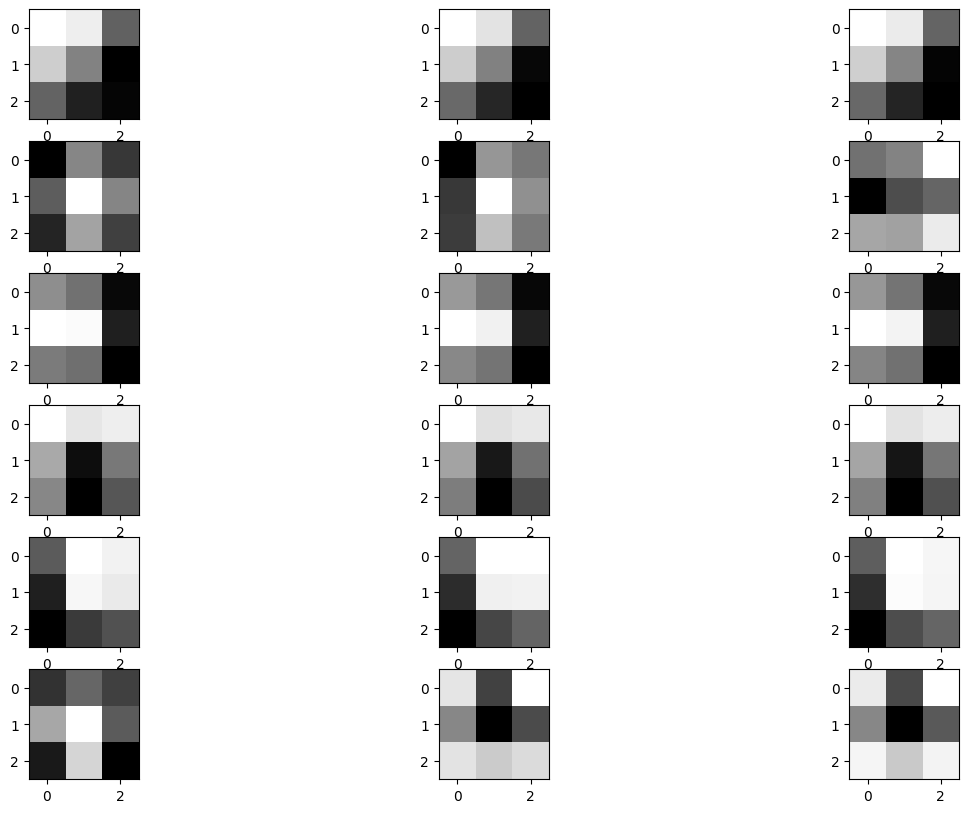

In [7]:
from matplotlib import pyplot

n_filters = 6

ix = 1

fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j],cmap='gray')
        ix+=1
pyplot.show()

In [16]:
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

NameError: name 'Model' is not defined